<a href="https://colab.research.google.com/github/Roshano1/AnalystPortfolio.github.io/blob/main/House_listing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Importing the Data

In [11]:
data = pd.read_csv('/content/HouseListings-Top45Cities-10292023-kaggle.csv.zip',sep=",",encoding='latin-1')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data understanding

In [13]:
data.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [14]:
data.shape

(35768, 10)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [16]:
data.duplicated().sum()

2516

## remove deplicated data

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(33252, 10)

In [19]:
data.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

**### Analysis Data**

In [20]:
data['Province'].unique()

array(['Ontario', 'British Columbia', 'Alberta', 'Manitoba',
       'Saskatchewan', 'Newfoundland and Labrador', 'New Brunswick',
       'Quebec', 'Nova Scotia'], dtype=object)

In [21]:
for col in data.columns:
  print(col,':' , data[col].nunique())

City : 45
Price : 4366
Address : 31379
Number_Beds : 31
Number_Baths : 22
Province : 9
Population : 45
Latitude : 45
Longitude : 44
Median_Family_Income : 32


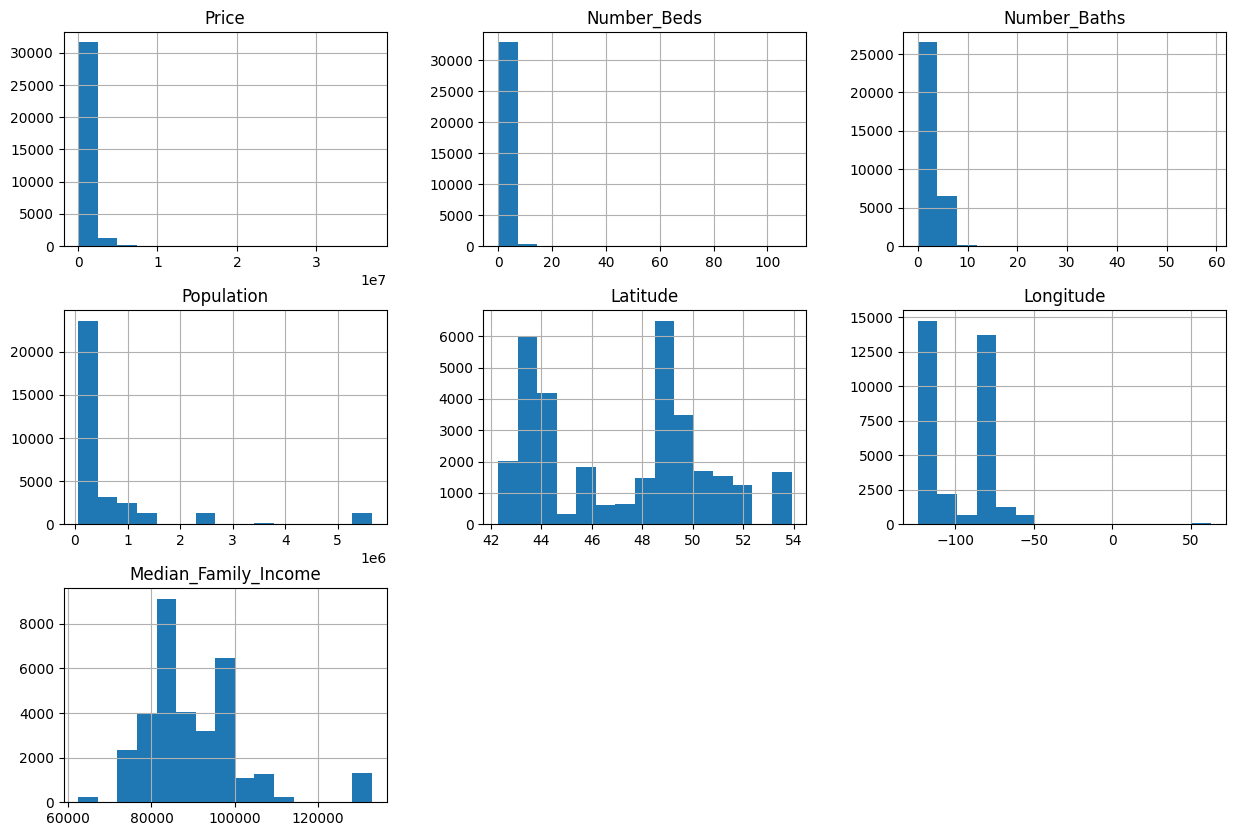

In [22]:
data.hist(bins=15, figsize=(15,10))
plt.show()

In [23]:
top10_city= data['City'].value_counts().sort_values(ascending = False)[:15]

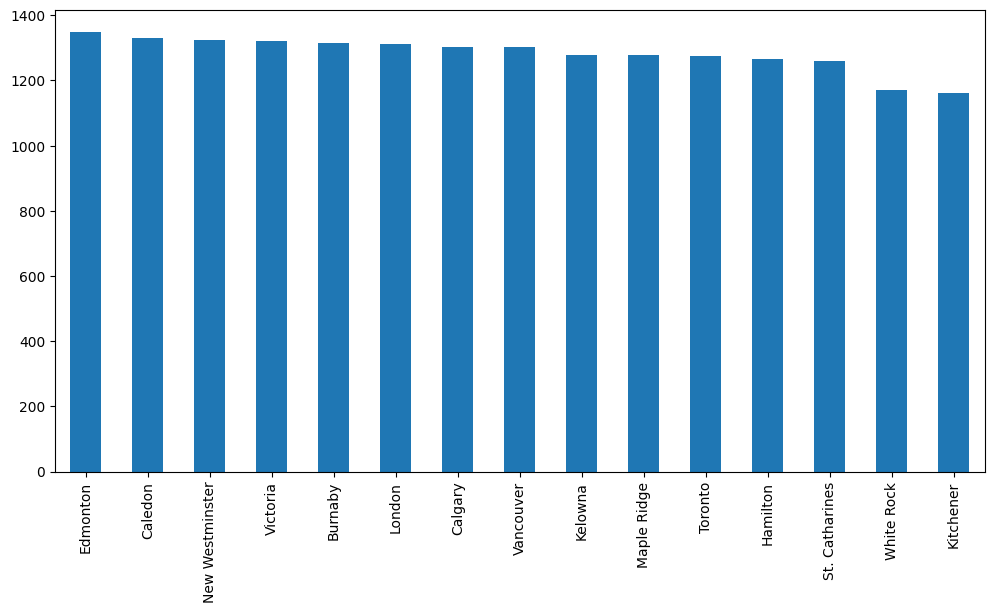

In [24]:
top10_city.plot.bar(figsize=(12,6))
plt.show()

In [25]:

  top10meanPrices = [data[data['City']== i]['Price'].mean() for i in list(top10_city.index)]

In [26]:
top10meanPrices

[425619.5525925926,
 1381227.9917355373,
 1186218.3197278911,
 1193180.525359576,
 1334027.6902587519,
 795111.2151029748,
 659794.5564082885,
 1860210.4815668203,
 1037038.5199374511,
 1496457.8302034428,
 1236027.9238618524,
 974525.3807266983,
 884357.2001588562,
 2221383.1715017064,
 924001.9018087855]

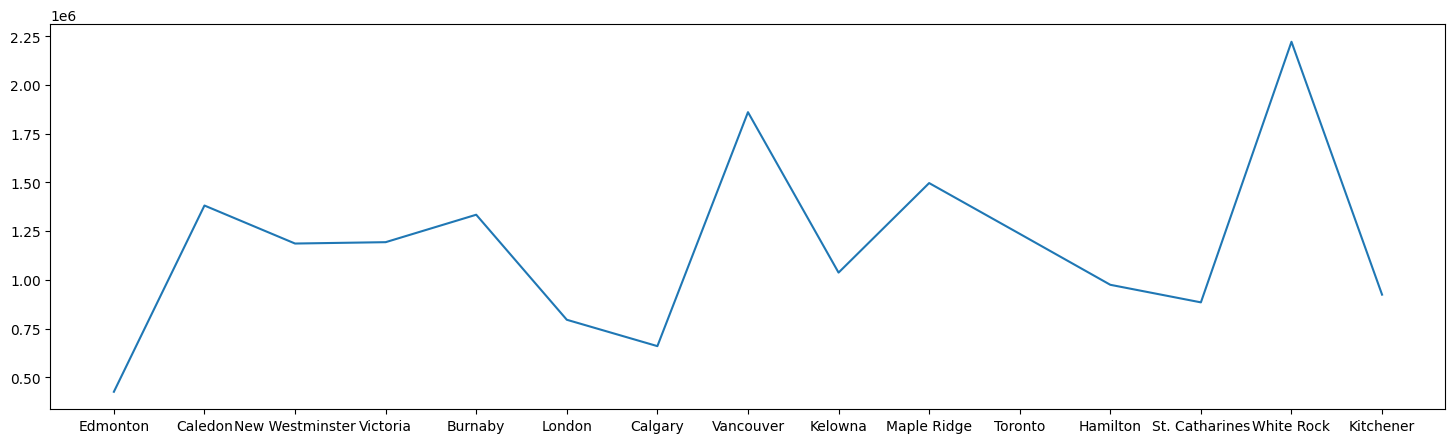

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))  # Set the size of the figure before plotting
plt.plot(top10_city.index, top10meanPrices)
plt.show()


## Visualize the Data

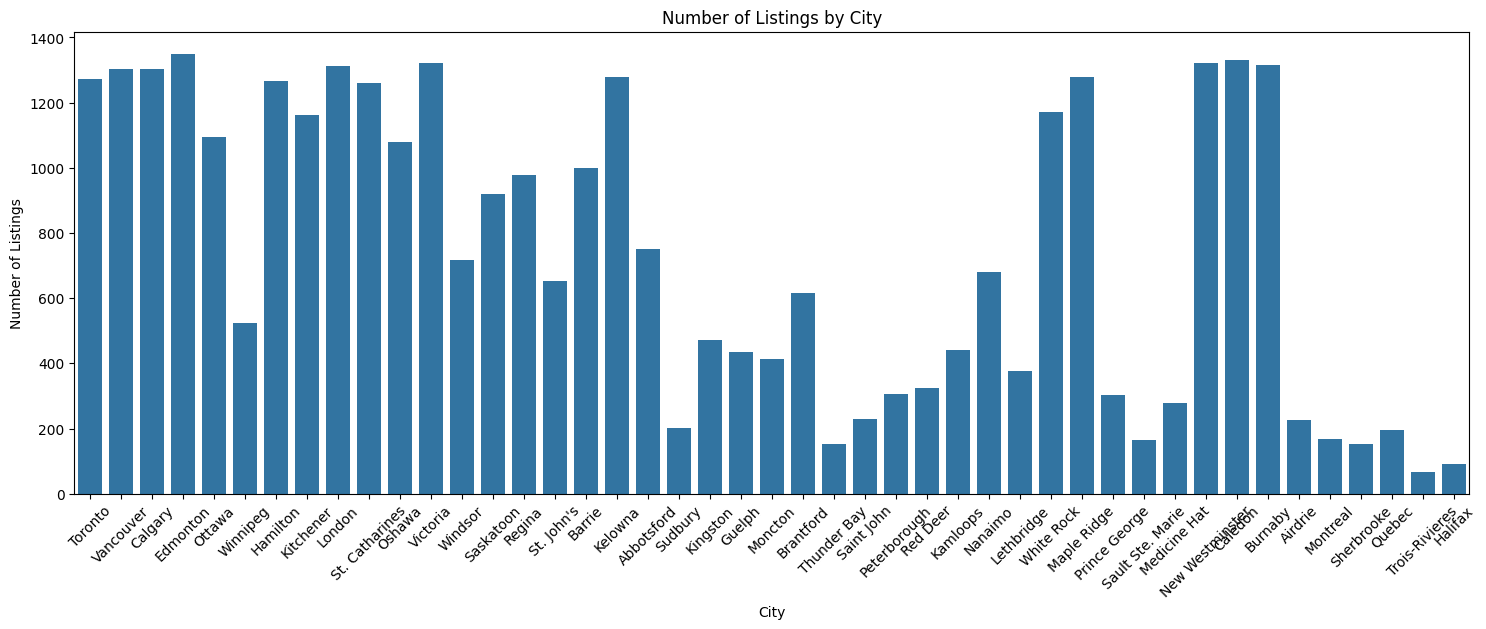

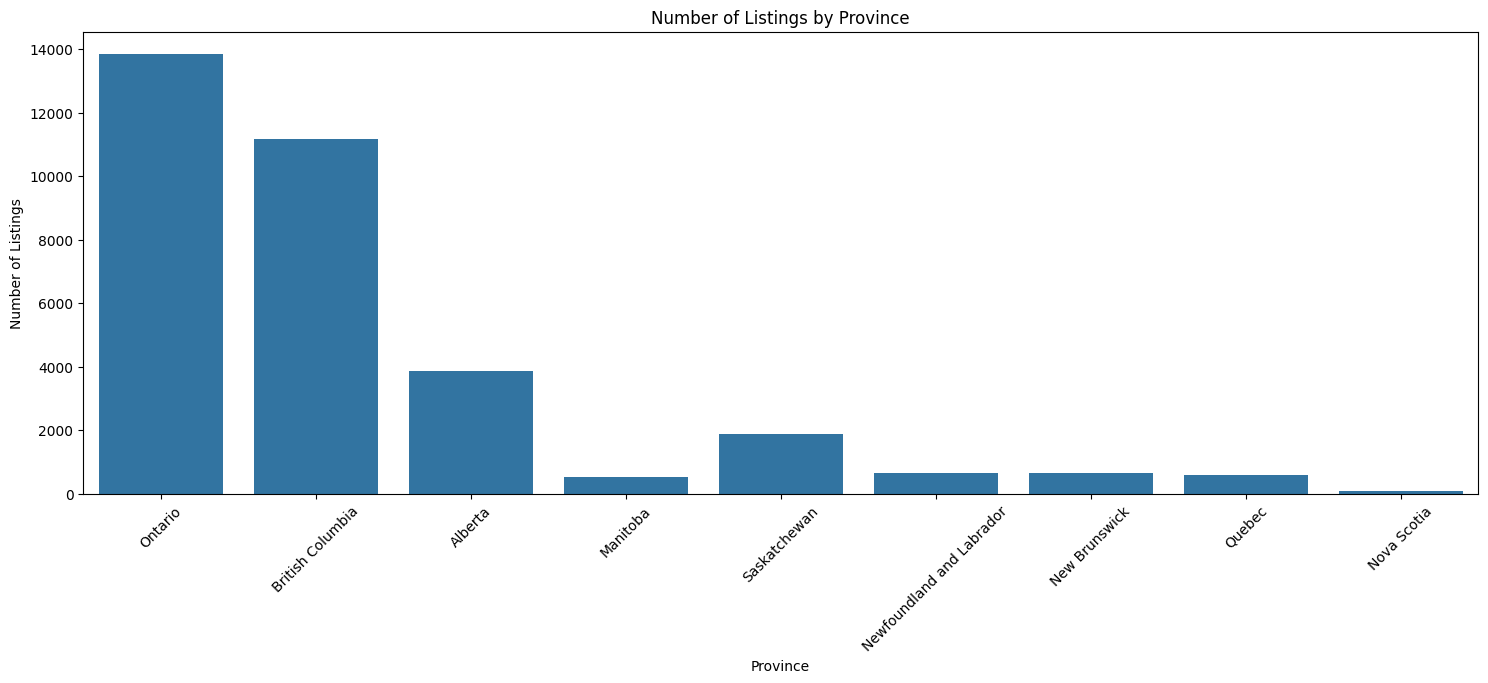

In [41]:
# Count plot of cities
plt.figure(figsize=(18, 6))
sns.countplot(x='City', data=data)
plt.title('Number of Listings by City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Count plot of provinces
plt.figure(figsize=(18, 6))
sns.countplot(x='Province', data=data)
plt.title('Number of Listings by Province')
plt.xlabel('Province')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


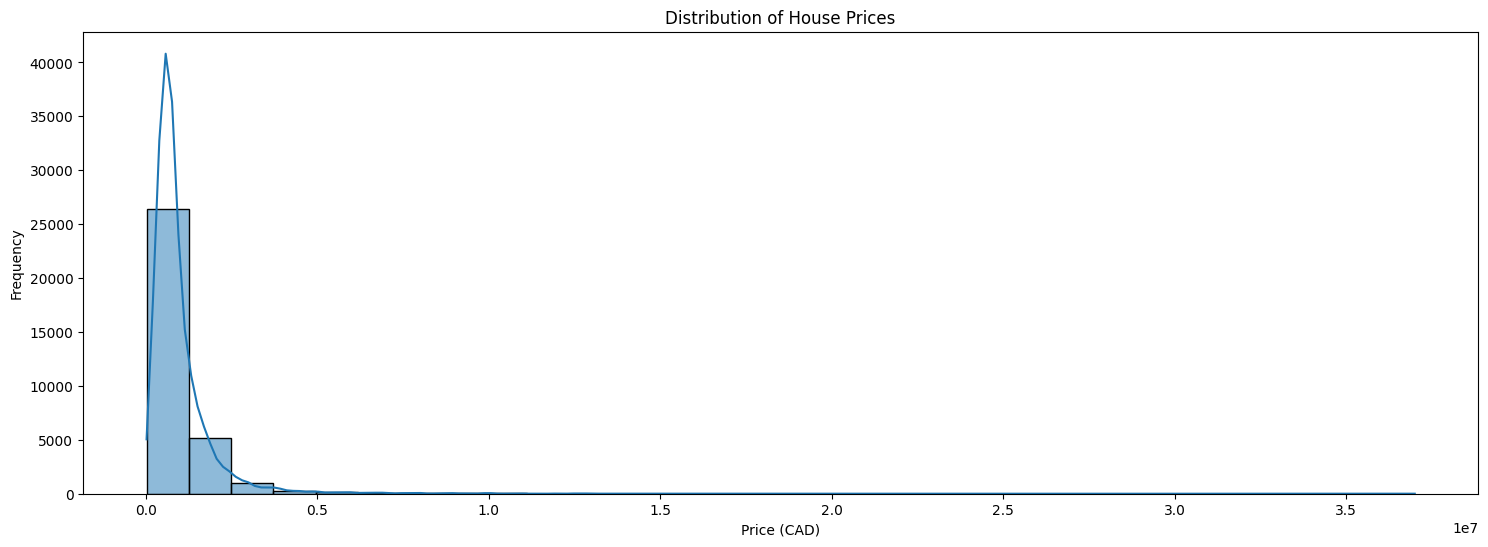

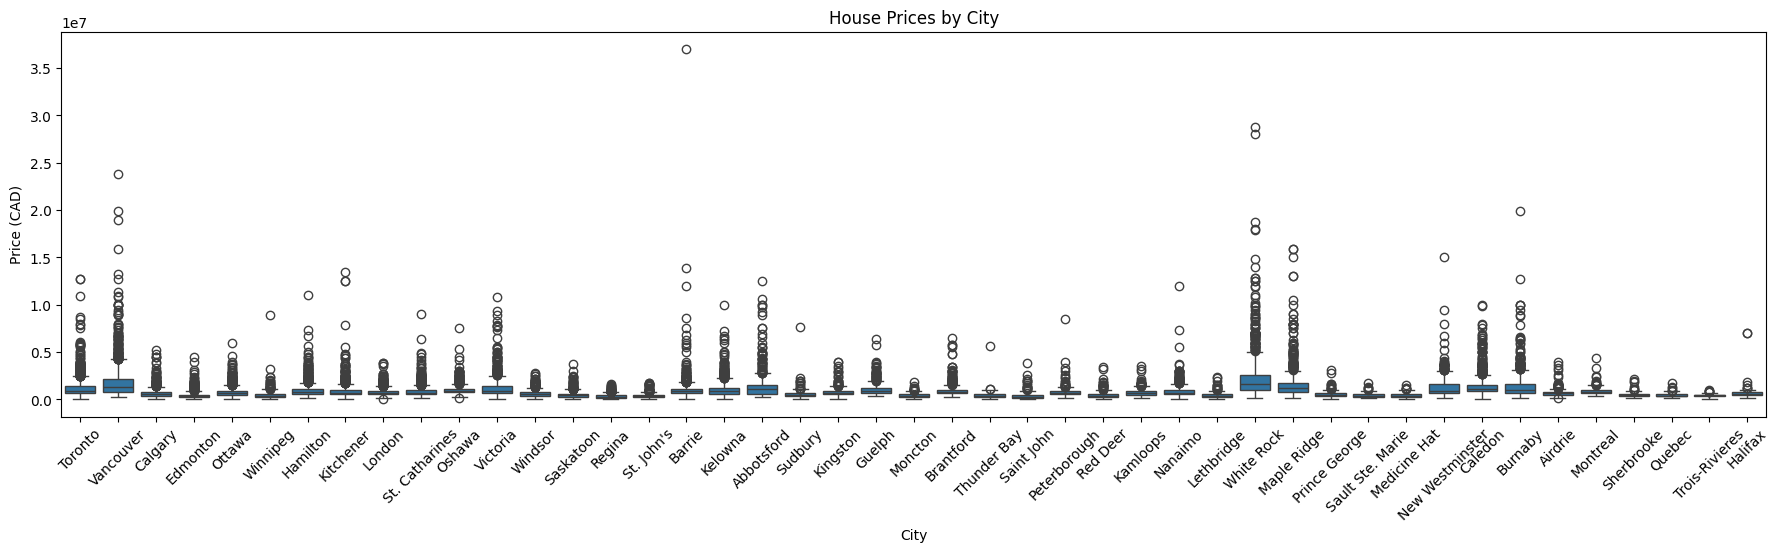

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of house prices
plt.figure(figsize=(18, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (CAD)')
plt.ylabel('Frequency')
plt.show()

# Box plot of house prices by city
plt.figure(figsize=(22, 5))
sns.boxplot(x='City', y='Price', data=data)
plt.title('House Prices by City')
plt.xlabel('City')
plt.ylabel('Price (CAD)')
plt.xticks(rotation=45)
plt.show()


## Relationship Between Categorical and Numerical Variables:

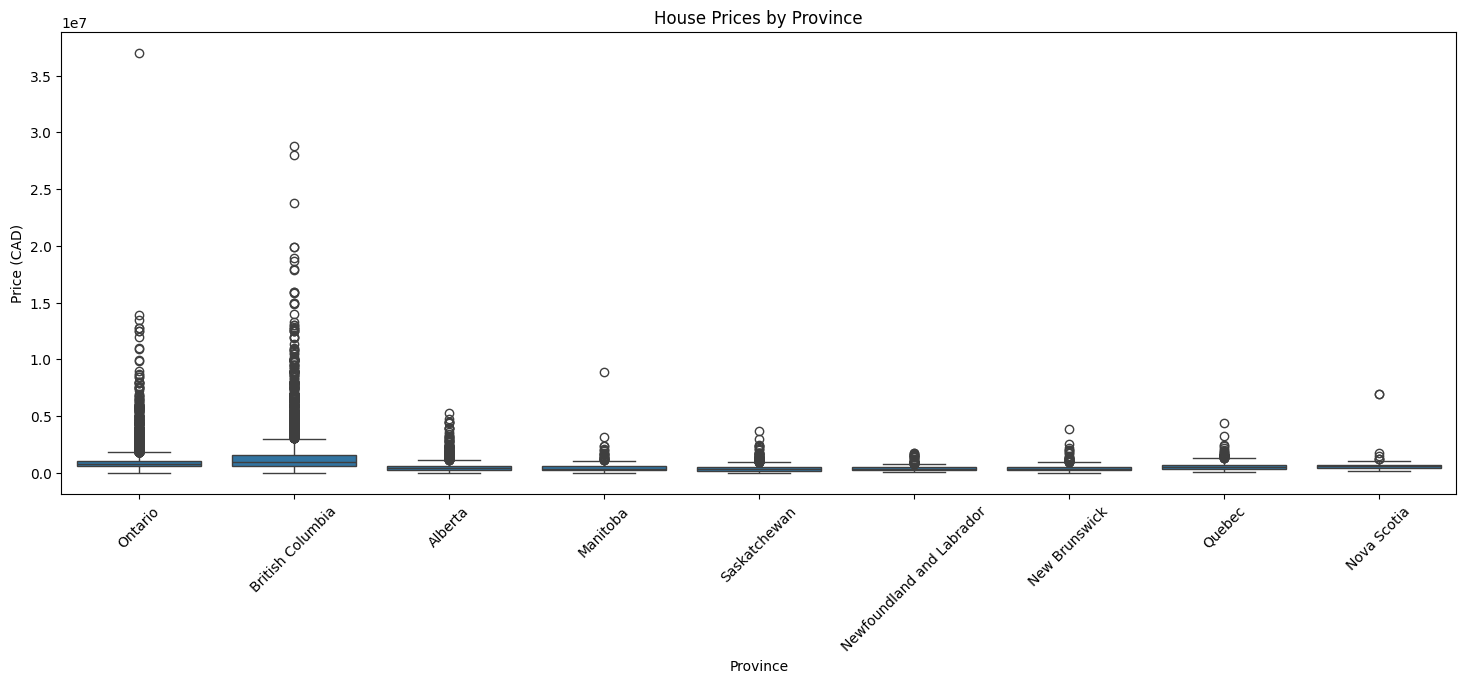

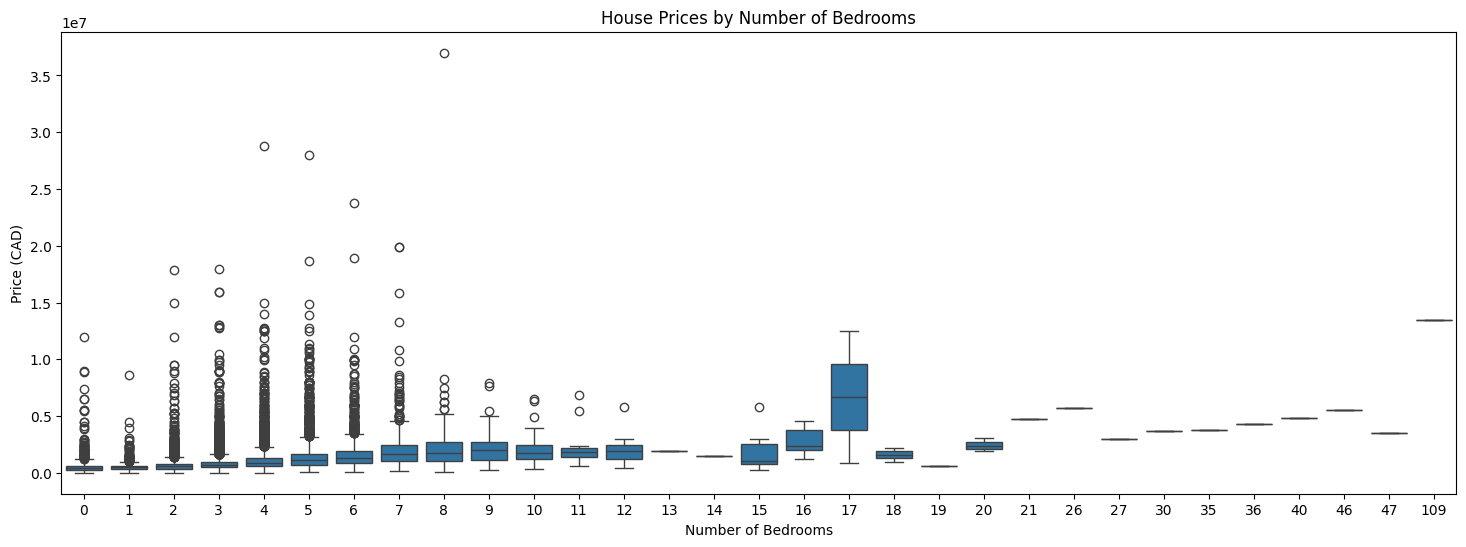

In [42]:
# Box plot of house prices by province
plt.figure(figsize=(18, 6))
sns.boxplot(x='Province', y='Price', data=data)
plt.title('House Prices by Province')
plt.xlabel('Province')
plt.ylabel('Price (CAD)')
plt.xticks(rotation=45)
plt.show()

# Box plot of house prices by number of bedrooms
plt.figure(figsize=(18, 6))
sns.boxplot(x='Number_Beds', y='Price', data=data)
plt.title('House Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (CAD)')
plt.show()


## 4. Geographical Visualization:


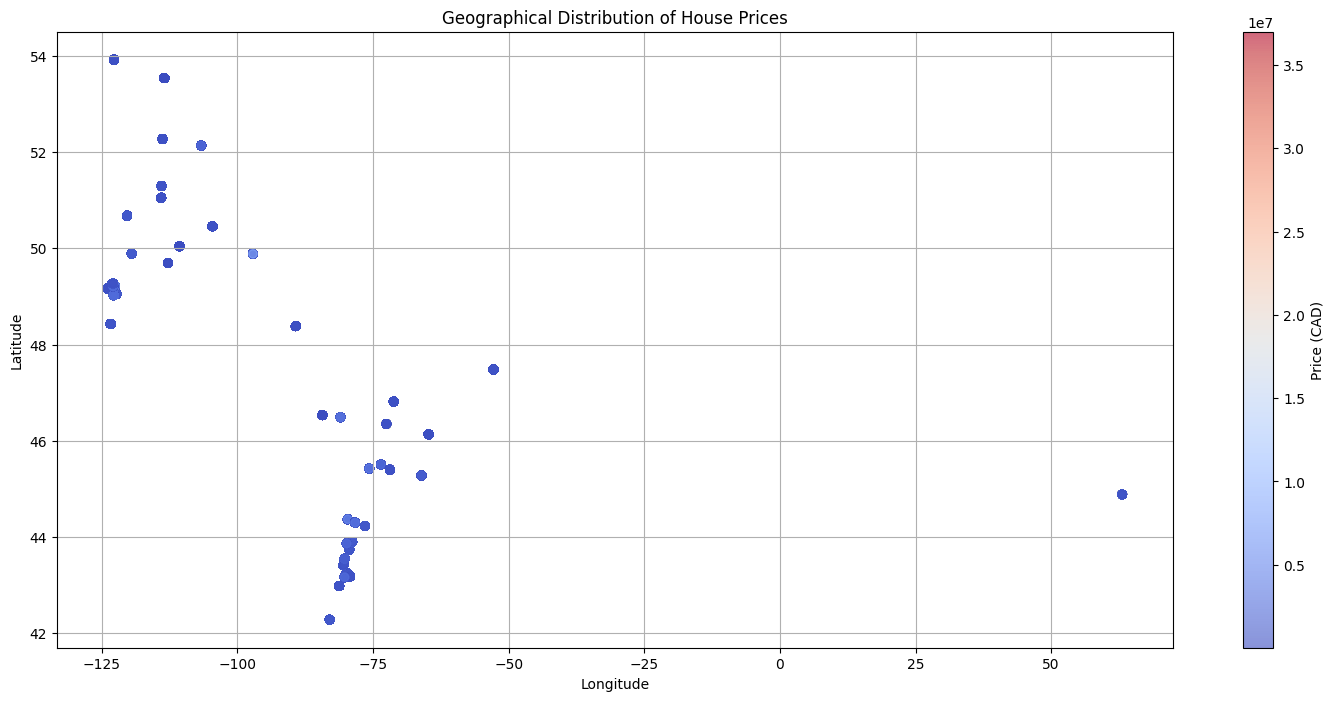

In [44]:
# Scatter plot of latitude and longitude
plt.figure(figsize=(18, 8))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Price'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Price (CAD)')
plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## Check Correlations

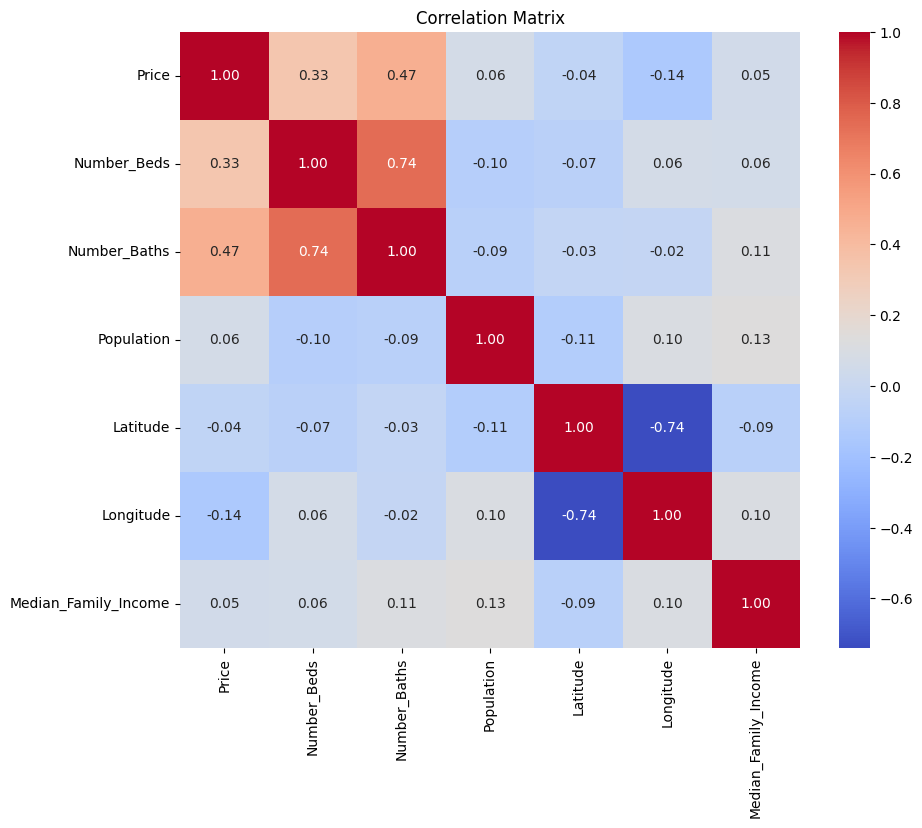

In [38]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## # Filter the data for Ottawa and Saskatoon


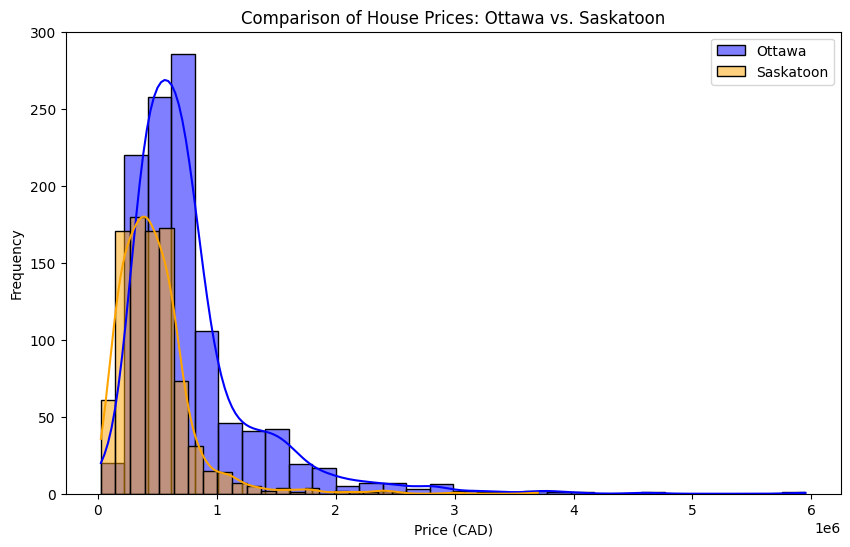

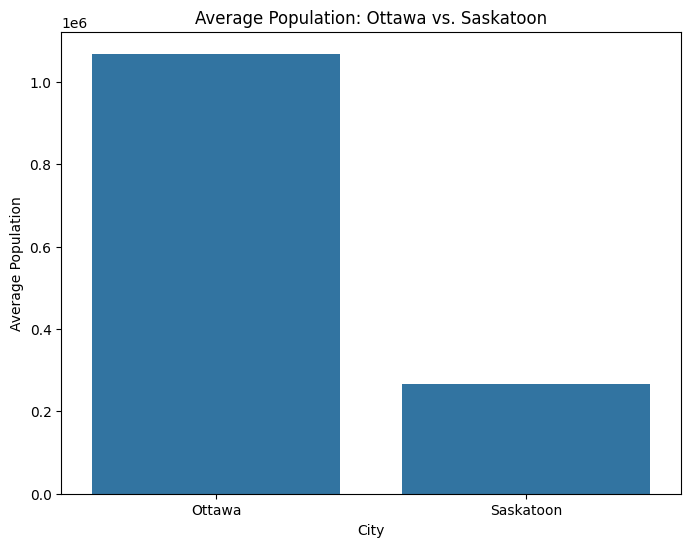

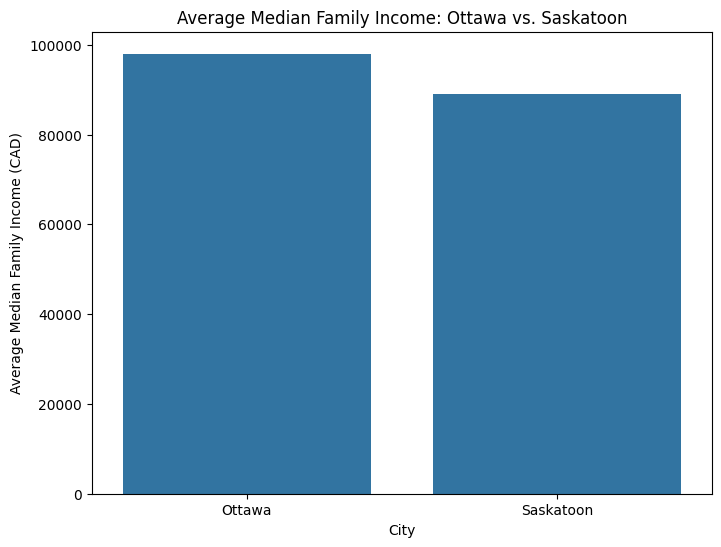

In [45]:
ottawa_data = data[data['City'] == 'Ottawa']
saskatoon_data = data[data['City'] == 'Saskatoon']

# Comparison of house prices
plt.figure(figsize=(10, 6))
sns.histplot(ottawa_data['Price'], bins=30, kde=True, color='blue', label='Ottawa', alpha=0.5)
sns.histplot(saskatoon_data['Price'], bins=30, kde=True, color='orange', label='Saskatoon', alpha=0.5)
plt.title('Comparison of House Prices: Ottawa vs. Saskatoon')
plt.xlabel('Price (CAD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Comparison of population
plt.figure(figsize=(8, 6))
sns.barplot(x=['Ottawa', 'Saskatoon'], y=[ottawa_data['Population'].mean(), saskatoon_data['Population'].mean()])
plt.title('Average Population: Ottawa vs. Saskatoon')
plt.xlabel('City')
plt.ylabel('Average Population')
plt.show()

# Comparison of median family income
plt.figure(figsize=(8, 6))
sns.barplot(x=['Ottawa', 'Saskatoon'], y=[ottawa_data['Median_Family_Income'].mean(), saskatoon_data['Median_Family_Income'].mean()])
plt.title('Average Median Family Income: Ottawa vs. Saskatoon')
plt.xlabel('City')
plt.ylabel('Average Median Family Income (CAD)')
plt.show()


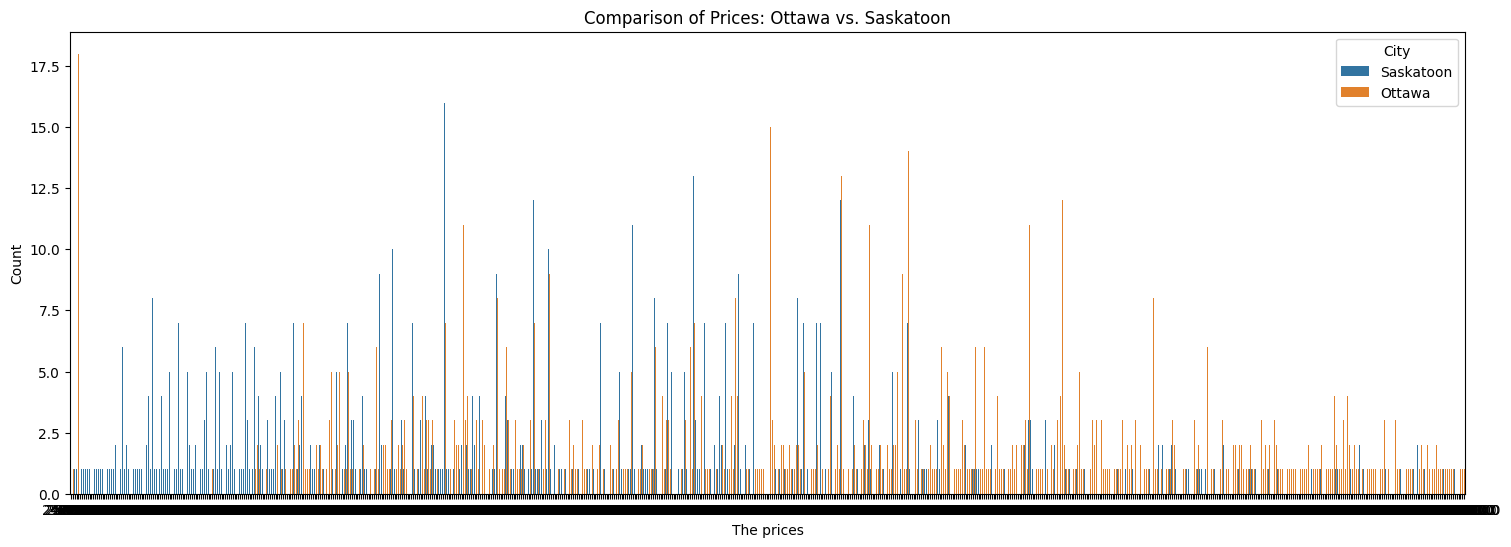

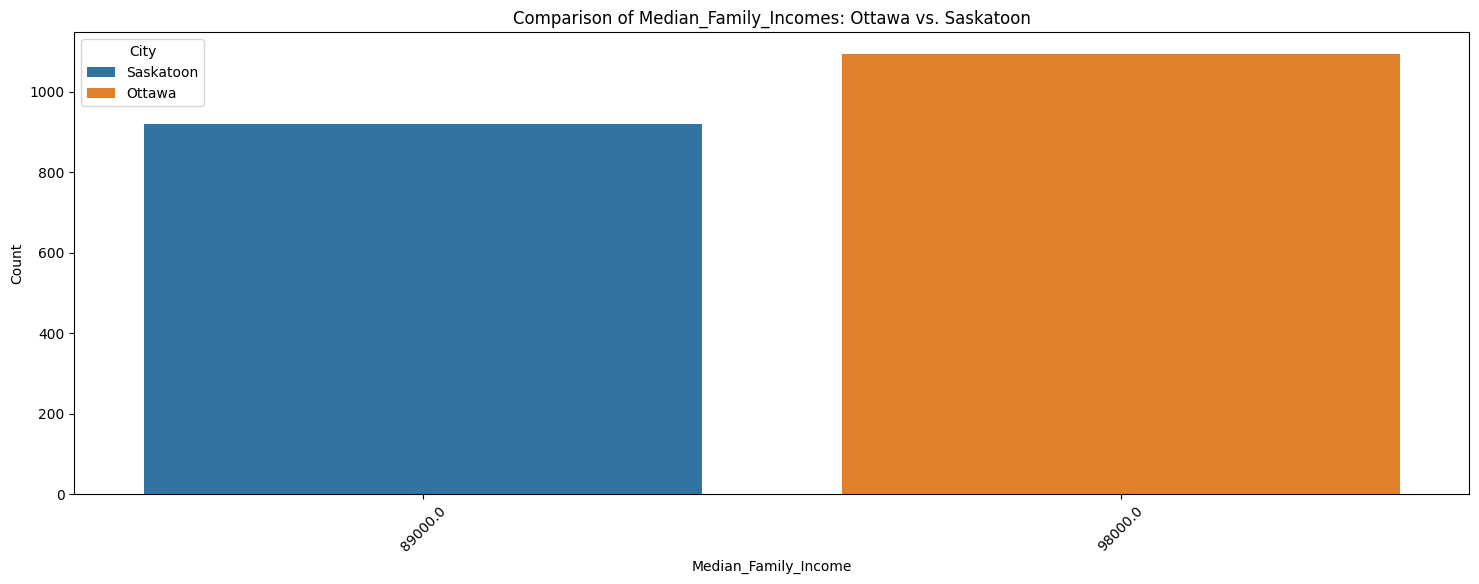

In [51]:

# Comparison of Prices
plt.figure(figsize=(18, 6))
sns.countplot(x='Price', hue='City', data=data[data['City'].isin(['Ottawa', 'Saskatoon'])])
plt.title('Comparison of Prices: Ottawa vs. Saskatoon')
plt.xlabel('The prices')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()

# Comparison of Median_Family_Incomes
plt.figure(figsize=(18, 6))
sns.countplot(x='Median_Family_Income', hue='City', data=data[data['City'].isin(['Ottawa', 'Saskatoon'])])
plt.title('Comparison of Median_Family_Incomes: Ottawa vs. Saskatoon')
plt.xlabel('Median_Family_Income')
plt.ylabel('Count')
plt.legend(title='City')
plt.xticks(rotation=45)
plt.show()

# Comparison of other relevant features (add more comparisons based on your dataset)
# For example, you can compare the distribution of prices for different property types or the correlation between prices and other features.


## download the original Data

In [31]:
from google.colab import files
files.download('HouseListings-Top45Cities-10292023-kaggle.csv.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## download the data

In [32]:
# Assuming you have made changes to your DataFrame 'df'

# Write DataFrame back to the same CSV file
data.to_csv('HouseListings-Top45Cities-10292023-kaggle.csv.zip', index=False)

# Download the updated CSV file
from google.colab import files
files.download('HouseListings-Top45Cities-10292023-kaggle.csv.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>